# Group-A Dashboard

In [19]:
# imports
import os
import requests
import json
import numpy as np
import pandas as pd

import panel as pn
pn.extension("plotly")
import hvplot.pandas

import plotly.express as px
from pathlib import Path
from dotenv import load_dotenv
import random
import yfinance as yf
import seaborn as sns 
import plotly.graph_objects as go
import plotly.figure_factory as ff
import matplotlib.pyplot as plt

%matplotlib inline

# IMPORT DATA 

## Stocks Data

In [2]:
# Stocks DataFrames
# file_path = Path("stock_dataframes/us_portfolio.csv")
# us_portfolio = pd.DataFrame(pd.read_csv(file_path))
# #us_portfolio

In [3]:
us_portfolio = px.data.stocks(indexed=True)-1
fig = px.area(us_portfolio, facet_col="company", height=800, facet_col_wrap=2)
#fig.show()

In [4]:
# Bar chart row facet - US portfolio returns
us_portfolio = px.data.stocks()
fig2 = px.box(us_portfolio, x="date", y=us_portfolio.columns)
#fig2.show()

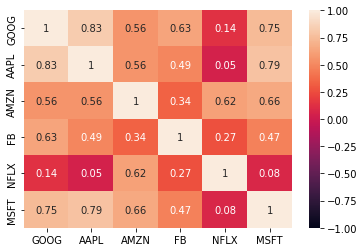

In [5]:
# Calculate the correlation using 'pearson' method
correlation_pearson = us_portfolio.corr(method='pearson')

# Display the correlation matrix
pearson_chart = sns.heatmap(correlation_pearson, vmin=-1, vmax=1, annot=True)


In [6]:
#AU Stocks Portfolio
file_path = Path("stock_dataframes/au_ytd_returns.csv")
au_ytd_returns = pd.DataFrame(pd.read_csv(file_path))
#chart_au_ytd_returns = au_ytd_returns.plot(figsize = (20,10), title = "Australian Stock Portfolio - Daily Returns")

# Calculate the rolling standard deviation for AU portfolio using a 21-day window
#au_ytd_returns.rolling(window=21).std()

# Plot the rolling standard deviation (21 day window)
#au_ytd_returns.rolling(window=21).std().plot(figsize=(20,10),title="Rolling Standard Deviation 21 day Window")

## Crypto Data

In [7]:
BTC_Ticker = yf.Ticker("BTC-AUD")
ETH_Ticker = yf.Ticker("ETH-AUD")
ADA_Ticker = yf.Ticker("ADA-AUD")
SOL_Ticker = yf.Ticker("SOL-AUD")
XRP_Ticker = yf.Ticker("XRP-AUD")
BCH_Ticker = yf.Ticker("BCH-AUD")

##Creat crypto DF 
crypto_data = yf.download("BCH-AUD XRP-AUD ADA-AUD SOL-AUD ETH-AUD BTC-AUD", period = "max")
#crypto_data.head(-10)

[*********************100%***********************]  6 of 6 completed


In [24]:
#creating df to display close for individual crypto 
crypto_data_close = crypto_data.drop(columns = ["Adj Close", "Open", "Volume", "High", "Low"])
#crypto_data_close

In [9]:
#calculating daily returns 
daily_returns_crypto = crypto_data_close.pct_change()
#daily_returns_crypto

In [37]:
#calculating cumulative retrurns
cumulative_returns_crypto = (1 + daily_returns_crypto).cumprod()
#cumulative_returns_crypto

In [35]:
#sharpe ration 
sharperatio = (daily_returns_crypto.mean()*252)/(daily_returns_crypto.std()* np.sqrt(252))
#sharperatio

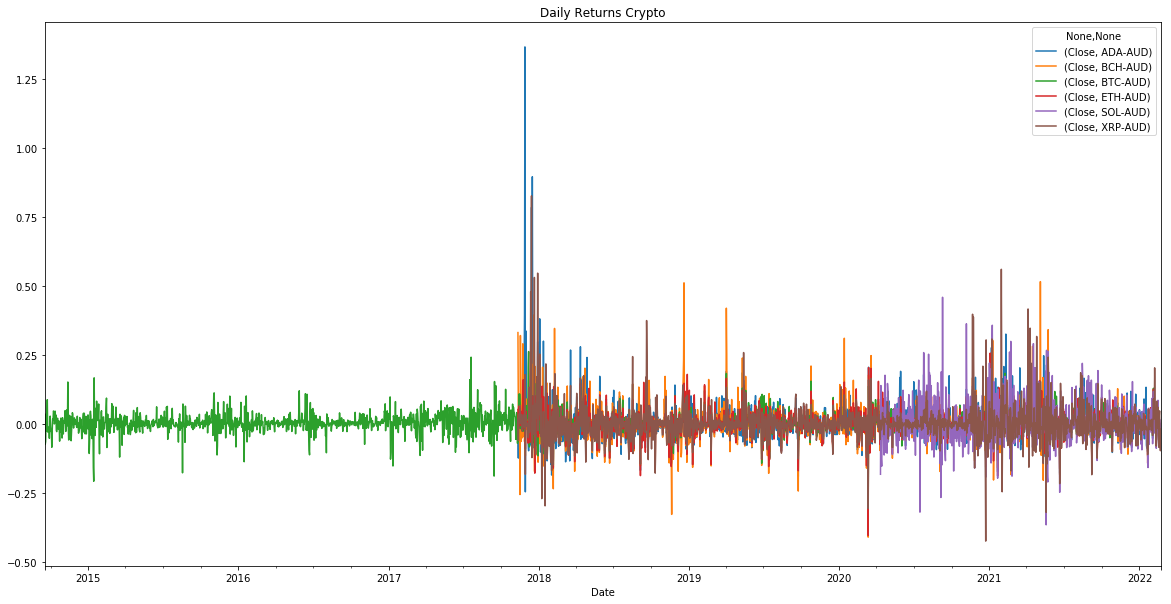

In [25]:
chart_crypto_daily_returns = daily_returns_crypto.plot(figsize = (20,10), title = "Daily Returns Crypto")
#chart_crypto_daily_returns

## Property Data

In [13]:
# Property DataFrame
file_path = Path("property_dataframe/cities_combined.csv")
df_combined = pd.DataFrame(pd.read_csv(file_path))
#df_combined.set_index('city',inplace=True)
#df_combined.head(10)

# Panel Visualization Functions

In [14]:
""" This Cel is for 5th tab """

#create_line_chart function
def create_line_chart(data, title, xlabel, ylabel, color):    
    create_line_chart = data.hvplot(title=title, xlabel=xlabel, ylabel=ylabel, color=color, height=400)
    return (create_line_chart)

sales_line_chart = create_line_chart(df_combined["totalSales"],"Number of Property Sold Per City",
                            "City", "Number of Sales", color= '#148503').opts(yformatter="%.0f")

#create_bar_chart function
def create_bar_chart(data, title, color):
    create_bar_chart = data.hvplot.bar(title=title, color=color, height=400)
    return (create_bar_chart)


plot_numberListedForAuction = create_bar_chart(df_combined.iloc[:,0], "Number of Property Listed For Auction", color='#726edb').opts(yformatter="%.0f")
plot_numberAuctioned = create_bar_chart(df_combined.iloc[:,3], "Number of Property Auctioned per city" , color='#043834').opts(yformatter="%.0f")
plot_totalSales = create_bar_chart(df_combined.iloc[:,5], "Total Sales ($AUD)" , color='#c2c36d').opts(yformatter="%.0f")
plot_median = create_bar_chart(df_combined.iloc[:,6], "Median Market Price ($AUD) " , color='#f0787e').opts(yformatter="%.0f")


In [15]:
# Create the sunburst chart using df_combined
sunburst_chart = px.sunburst(
    df_combined,
    path=['city','totalSales'],
    values="numberSold",
    color='totalSales',
    title="Overal Property Market in 5 Cities For Latest Auction ",
    height=500
)
#sunburst_chart.show()

## Panel Dashboard

In [27]:
# Create a Title for the Dashboard
dasboard_title= "Investor's Return Analysis Based on 3 Assets Portfolio"

# Define a welcome text
dashboard_desc = "This dashboard provides Interactive Visualizations, and Static Charts to help the investors get an oversight about the performance of their portfolio"

# Creating tabs layout for the dashboard
welcome_tab = pn.Column(
    "This dashboard provides Interactive Visualizations, and Static Charts to help the investors get an oversight about the performance of their portfolio")

Crypto_tab = pn.Column(
    "The Crypto Market",
    chart_crypto_daily_returns
)

stock_tab_AU = pn.Column(
    "Australian Stocks",
    #chart_au_ytd_returns    
)

stock_tab_US = pn.Column(
    " U.S. Stocks ", 
    fig, #Facet Area Plots
    fig2, #Bar Chart Facet Plot
    pearson_chart
)


property_tab = pn.Column(
        "AU Property Market Based on the Latest Auction ", 
        sales_line_chart + plot_median, 
        sunburst_chart,
        plot_totalSales + plot_numberAuctioned 
)            


## Panel Tabs

In [28]:
# Create the main dashboard
dashboard = pn.Tabs(
    (" Welcome! ", welcome_tab),
    (" Crypto Assets ", Crypto_tab ),
    (" AU Stocks ", stock_tab_AU),
    (" US Stocks ", stock_tab_US),
    (" Recent Property Auctions ", property_tab)    
)

## Serving The Panel

In [31]:
#Serve the Panel Dashboard
#dashboard.show()
dashboard.servable()

Tabs(active=4)
    [0] Column
        [0] Markdown(str)
    [1] Column
        [0] Markdown(str)
        [1] Str(AxesSubplot)
    [2] Column
        [0] Markdown(str)
    [3] Column
        [0] Markdown(str)
        [1] Plotly(Figure, viewport={'xaxis.range': ['2018-01-...})
        [2] Plotly(Figure, viewport={'xaxis.range': ['2017-12-...})
        [3] Str(AxesSubplot)
    [4] Column
        [0] Markdown(str)
        [1] HoloViews(Layout)
        [2] Plotly(Figure)
        [3] HoloViews(Layout)